# Quantum Process Tomography

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [1]:
import numpy as np
from qutip import (about, qeye, qpt, qpt_plot_combined, sigmax, sigmay, sigmaz,
                   spost, spre)
from qutip_qip.operations import (cnot, fredkin, iswap, phasegate, snot,
                                  sqrtiswap, swap, toffoli)

%matplotlib inline

In [2]:
"""
Plot the process tomography matrices for some 1, 2, and 3-qubit qubit gates.
"""
gates = [
    ["C-NOT", cnot()],
    ["SWAP", swap()],
    ["$i$SWAP", iswap()],
    [r"$\sqrt{i\mathrm{SWAP}}$", sqrtiswap()],
    ["S-NOT", snot()],
    [r"$\pi/2$ phase gate", phasegate(np.pi / 2)],
    ["Toffoli", toffoli()],
    ["Fredkin", fredkin()],
]

In [3]:
def plt_qpt_gate(gate, figsize=(8, 6)):

    name = gate[0]
    U_psi = gate[1]

    N = len(U_psi.dims[0])  # number of qubits

    # create a superoperator for the density matrix
    # transformation rho = U_psi * rho_0 * U_psi.dag()
    U_rho = spre(U_psi) * spost(U_psi.dag())

    # operator basis for the process tomography
    op_basis = [[qeye(2), sigmax(), sigmay(), sigmaz()] for i in range(N)]

    # labels for operator basis
    op_label = [["$i$", "$x$", "$y$", "$z$"] for i in range(N)]

    # calculate the chi matrix
    chi = qpt(U_rho, op_basis)

    # visualize the chi matrix
    fig, ax = qpt_plot_combined(chi, op_label, name, figsize=figsize)

    ax.set_title(name)

    return fig, ax

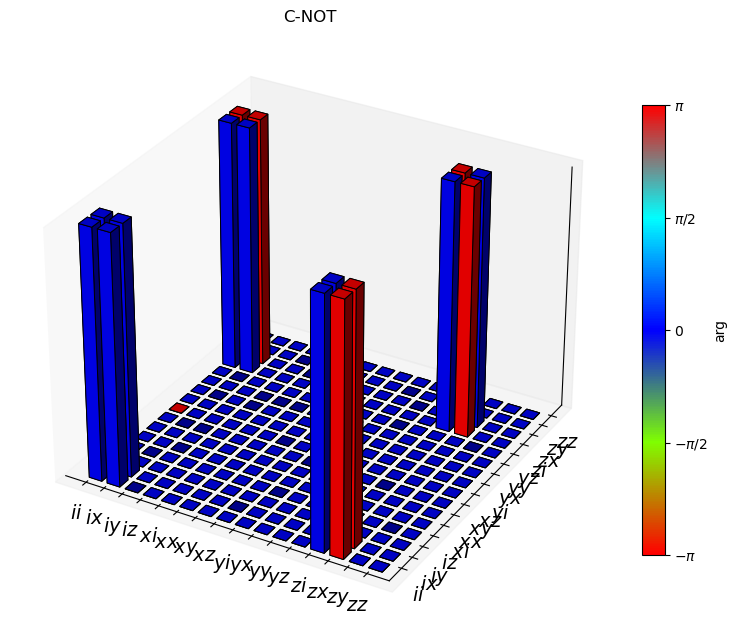

In [4]:
plt_qpt_gate(gates[0]);

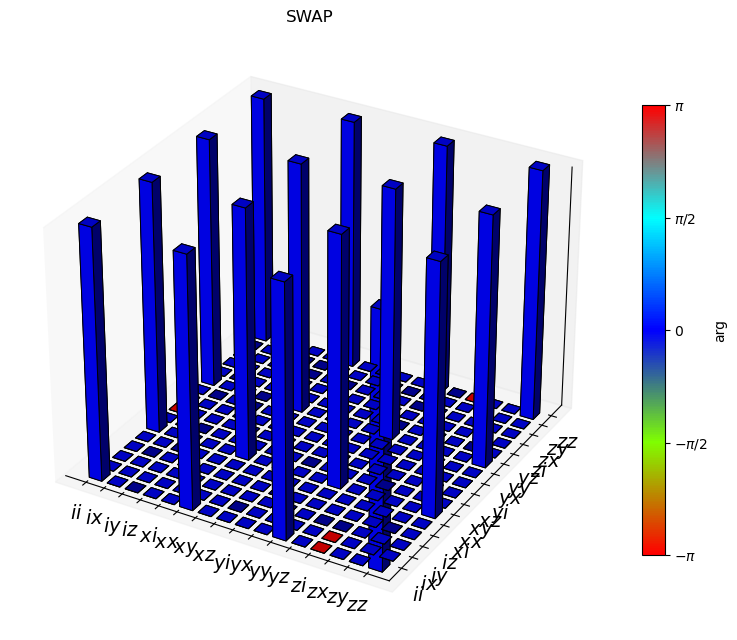

In [5]:
plt_qpt_gate(gates[1]);

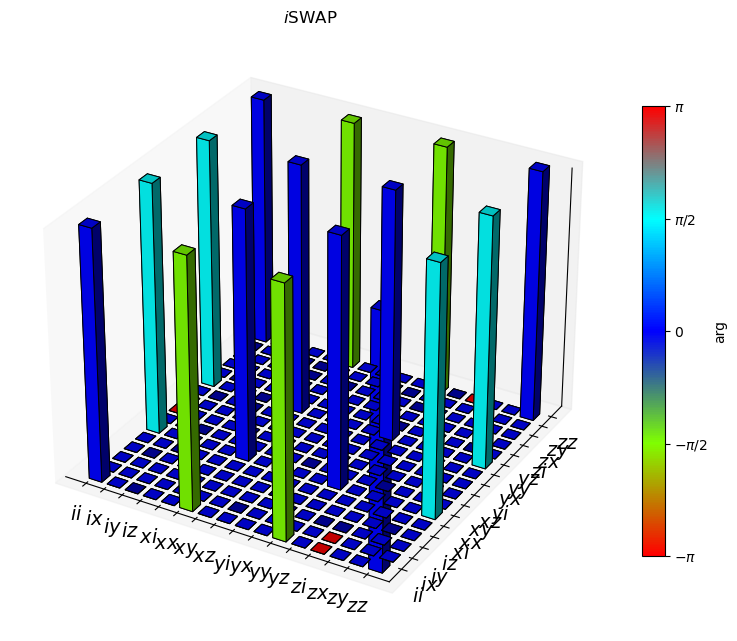

In [6]:
plt_qpt_gate(gates[2]);

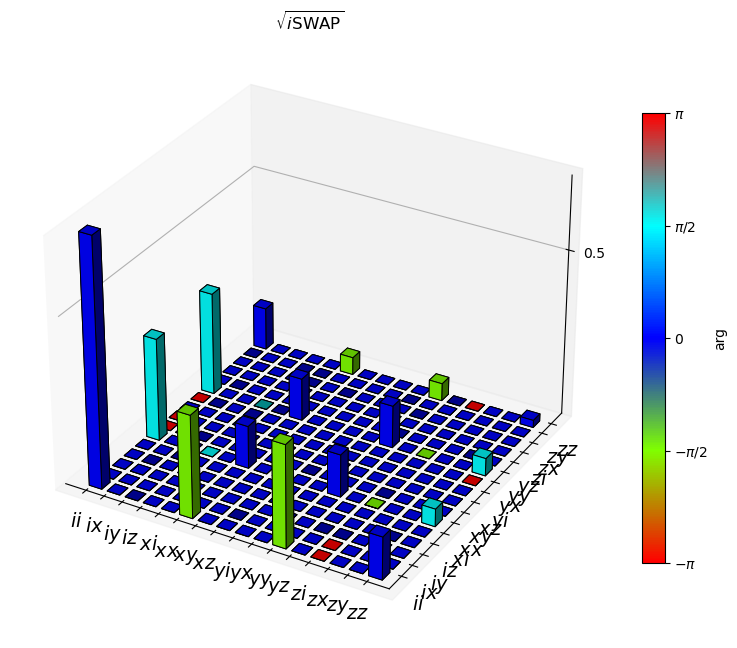

In [7]:
plt_qpt_gate(gates[3]);

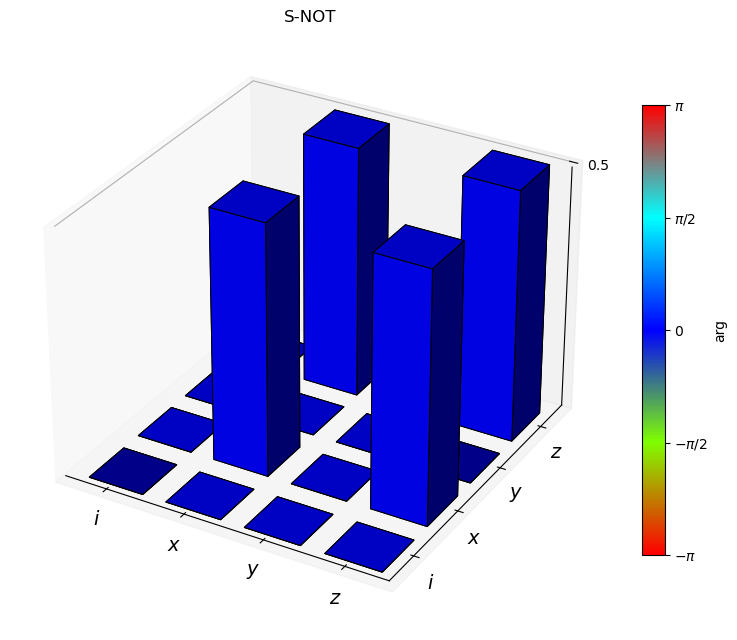

In [8]:
plt_qpt_gate(gates[4]);

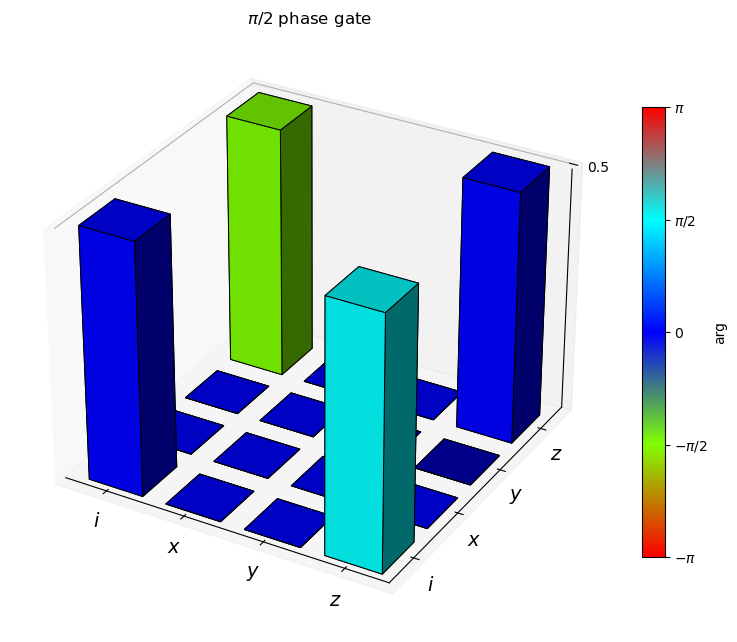

In [9]:
plt_qpt_gate(gates[5]);

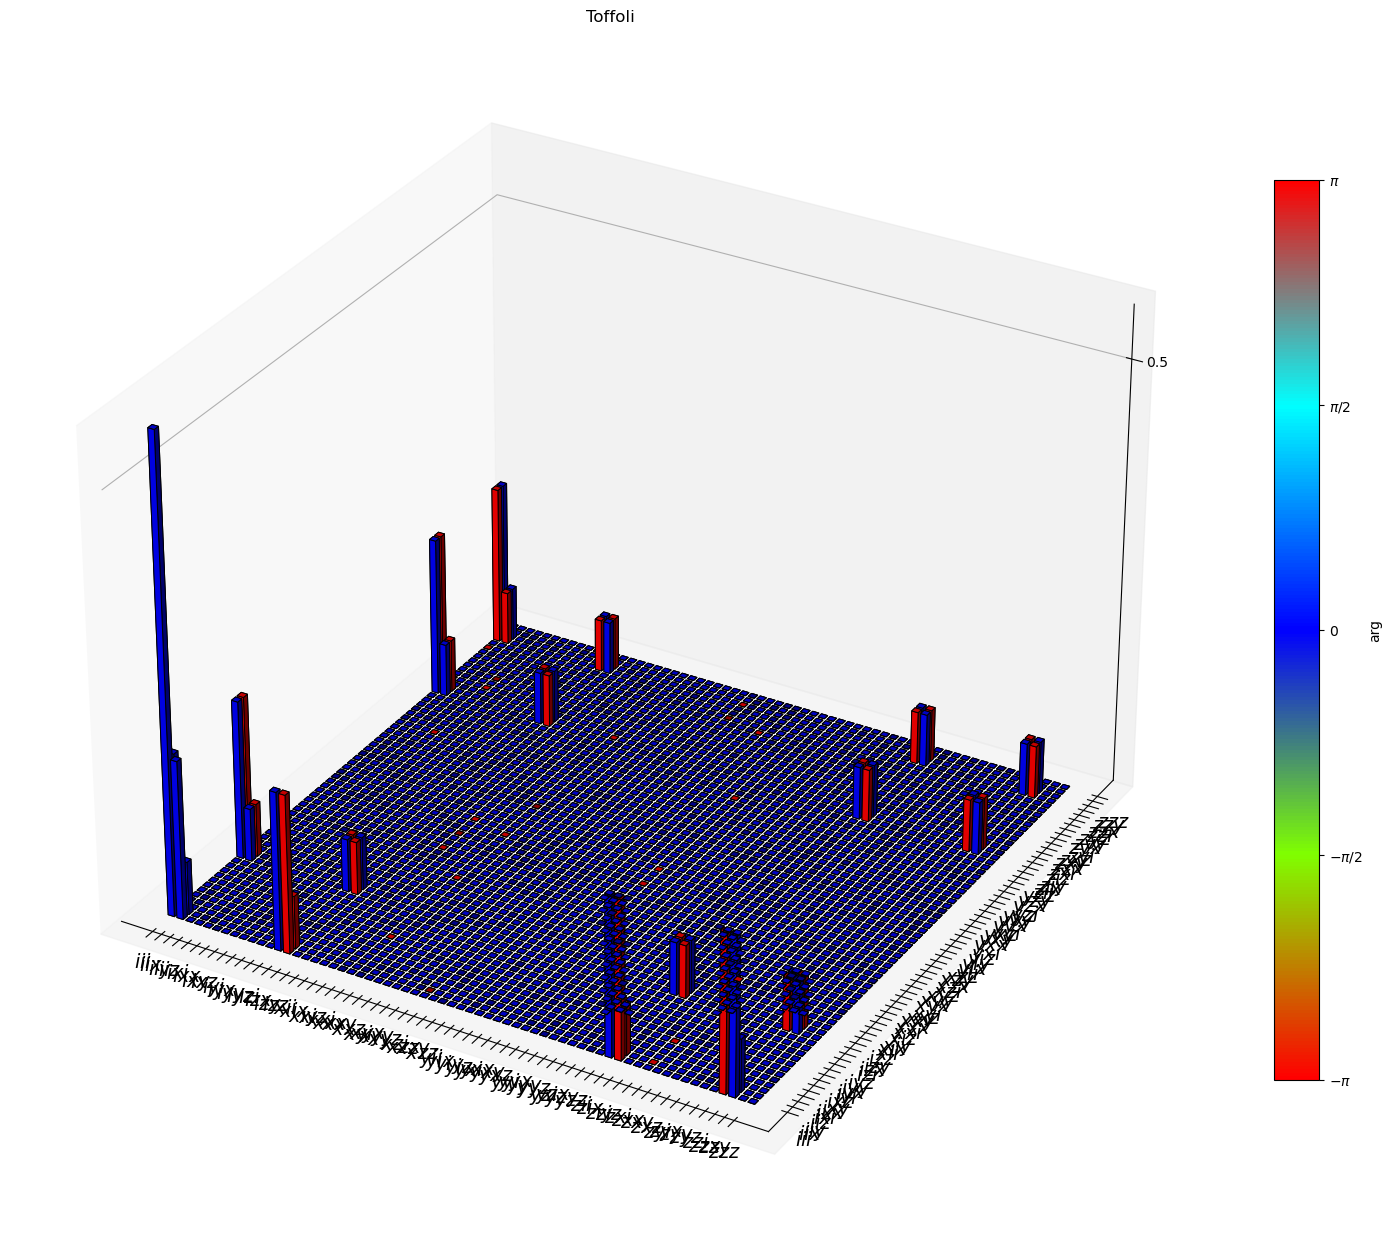

In [10]:
fig, ax = plt_qpt_gate(gates[6], figsize=(16, 12))
ax.axis("tight");

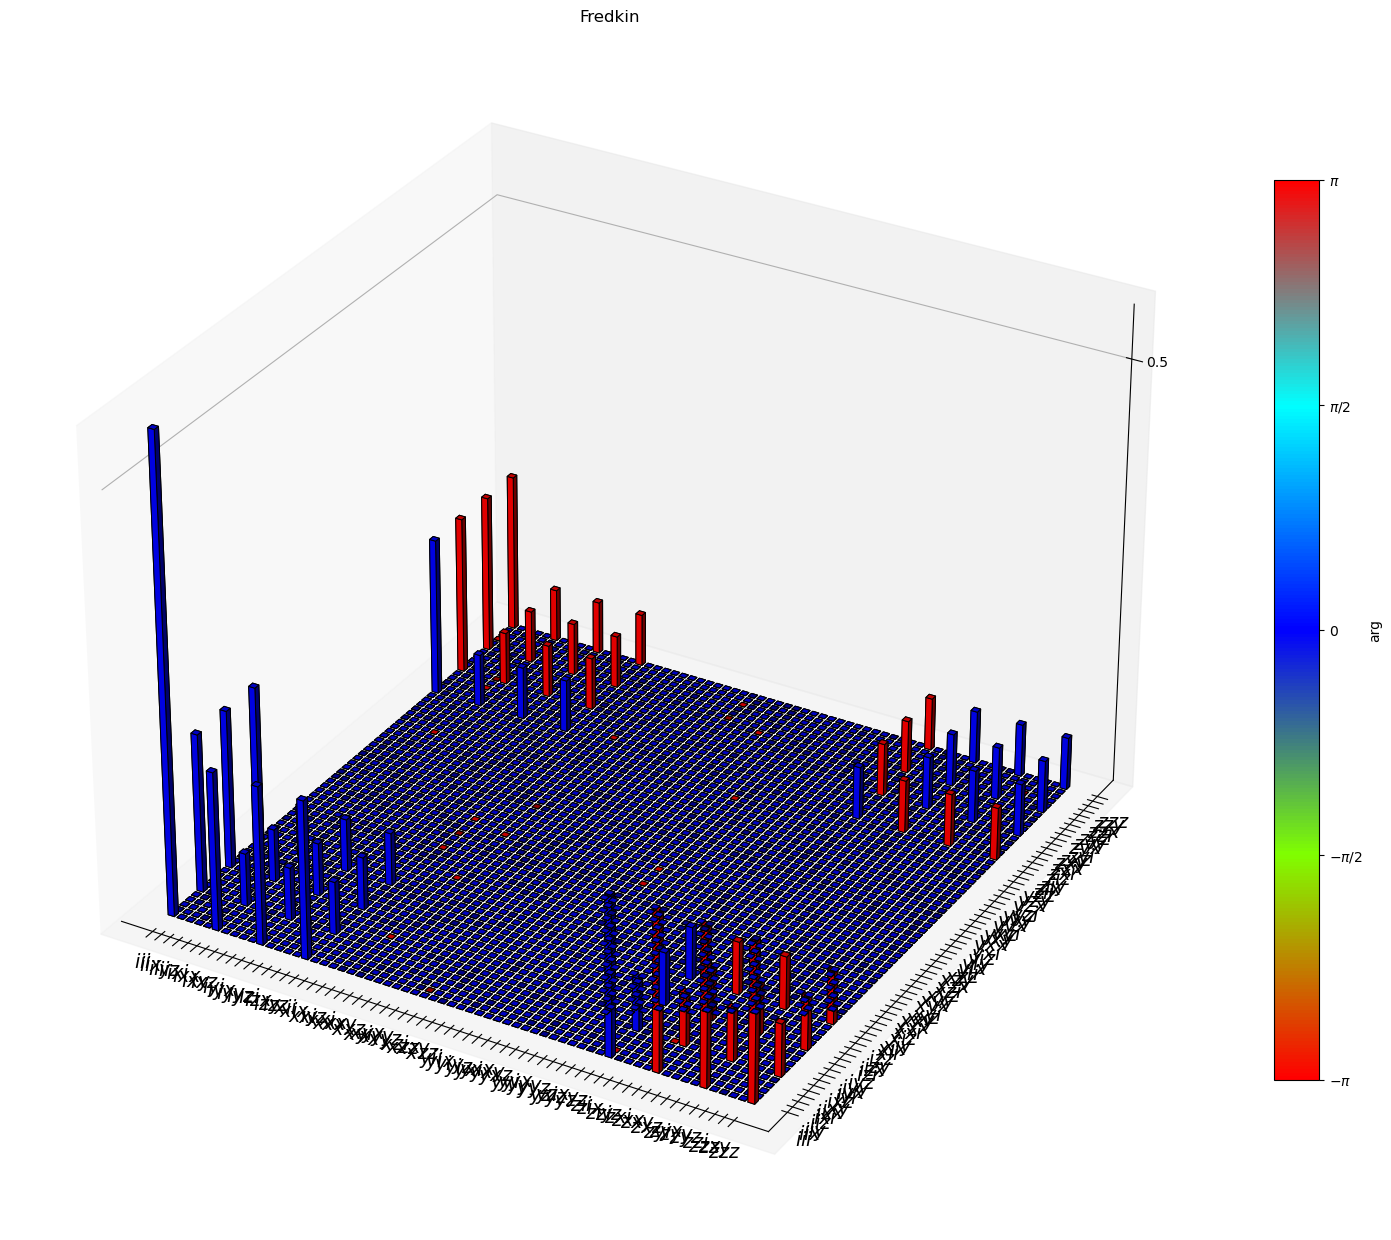

In [11]:
fig, ax = plt_qpt_gate(gates[7], figsize=(16, 12))
ax.axis("tight");

## Versions

In [12]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Simon Cross, Asier Galicia, Paul Menczel, and Patrick Hopf.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.3.0.dev0+6e4b53d
Numpy Version:      2.3.5
Scipy Version:      1.16.3
Cython Version:     3.2.2
Matplotlib Version: 3.10.8
Python Version:     3.12.0
Number of CPUs:     4
BLAS Info:          blas
INTEL MKL Ext:      None
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/miniconda3/envs/test-environment-v5/lib/python3.12/site-packages/qutip

Installed QuTiP family packages
-------------------------------

qutip-qtrl: 

qutip-jax: 0.1.1.dev6
qutip-qip: 0.5.0.dev0+81a92b9

Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`
